In [1]:
!pip install word2number
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=11905f3fac11f6d1b3bdbed9c583dd709c6cec3e2a49a2e7b49118557933dd1f
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [2]:
d = pd.read_csv("hiring.csv")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
d["experience"] = d["experience"].replace("NaN","Zero")
d["experience"] = d["experience"].replace("Nan","Zero")
d["experience"] = d["experience"].replace("nan","Zero")
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
d["experience"] = d["experience"].replace("nan","Zero")

In [6]:
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
d["experience"] = d["experience"].astype(str)
d["experience"] = d["experience"].apply(w2n.word_to_num)


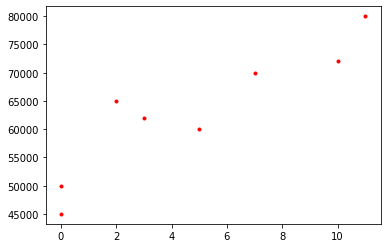

In [8]:
%matplotlib inline
plt.scatter(d.experience,d['salary($)'], marker='.', color='red')

In [9]:
import math
Mean_test = math.floor(d['test_score(out of 10)'].mean())
Mean_test

7

In [10]:
d['test_score(out of 10)']=d['test_score(out of 10)'].fillna(Mean_test)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [17]:
reg = linear_model.LinearRegression()
reg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
reg.predict([[2,9,6]])

array([45000])

In [13]:
predicted = reg.predict([[12,10,10]])
math.floor(predicted)

80000